# Tutorial for output.AimsOutput

You may have experienced that DFT codes tend to produce awfully long output files. Finding anything in these files by hand is tedious. You could use <code>grep</code> but that's not fun either. Luckily <code>output.AimsOutput</code> is here for you.

First we'll load the dependecies.

In [19]:
import matplotlib.pyplot as plt
from dfttools.output import AimsOutput

## Checking convergence and basic outputs

Let's now load the output of our latest AIMS calculation.

In [20]:
aims = AimsOutput('data/aims.out')

print( ''.join(aims.lines) )

------------------------------------------------------------
          Invoking FHI-aims ...

          When using FHI-aims, please cite the following reference:

            Volker Blum, Ralf Gehrke, Felix Hanke, Paula Havu,
            Ville Havu, Xinguo Ren, Karsten Reuter, and Matthias Scheffler,
            'Ab Initio Molecular Simulations with Numeric Atom-Centered Orbitals',
            Computer Physics Communications 180, 2175-2196 (2009)

          In addition, many other developments in FHI-aims are likely important for
          your particular application. If so, please cite them. A partial list of references
          is written at the end of this file. Thank you for giving credit to the authors
          of these developments.

          For general information about FHI-aims please find us at

            https://fhi-aims.org

          Online tutorials can be found at

            https://fhi-aims-club.gitlab.io/tutorials/tutorials-overview/

          For any questions

Let's see if it has exited normally. Well, the text output above shows that it has, I guess, but if you wanted to automatise it you cannot look at each file separately.

In [21]:
aims.check_exit_normal()

True

Ok now let's look at the convergence of the energy. We will do this by using the function <code>get_change_of_total_energy</code>. Many getter functions have the <code>n_occurrence</code> keyword. It is preset to <code>-1</code> which means, it will return the last occurrence of the property that you ask for. If you want all occurrences, you can use <code>n_occurrence=None</code>.

Text(0, 0.5, 'Change of total energy / eV')

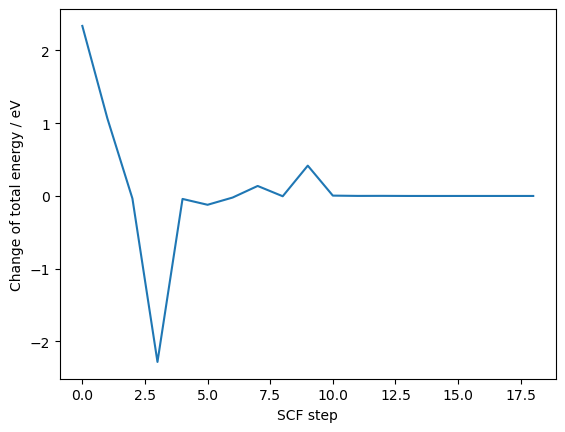

In [22]:
change_of_energy = aims.get_change_of_total_energy(n_occurrence=None)

plt.plot(change_of_energy)
plt.xlabel('SCF step')
plt.ylabel('Change of total energy / eV')

We can compare this to the convergence paramerters.

In [34]:
get_conv_params = aims.get_conv_params()

for k, i in get_conv_params.items():
    print(k, i)

charge_density 1e-05
sum_eigenvalues 0.001
total_energy 1e-06
total_force 0.001


Cool. Our calculation is converged. Let's get a few more outputs.

In [31]:
# Total energy
E_tot = aims.get_energy_corrected()

# Energy of vdW correction
E_vdw = aims.get_vdw_energy()

# Exchange-correlation energy
E_xc = aims.get_exchange_correlation_energy()

# HOMO energy
E_homo = aims.get_HOMO_energy()

# Sum of Eigenvalues
E_sum_eig = aims.get_sum_of_eigenvalues()

print(E_tot, E_vdw, E_xc, E_homo, E_sum_eig)


-45245.8619881323 -0.3067297 -966.99370188 -6.10975048 -26628.08838531


## Getting the geometry

Often we want to look at the geometry that we calculated.

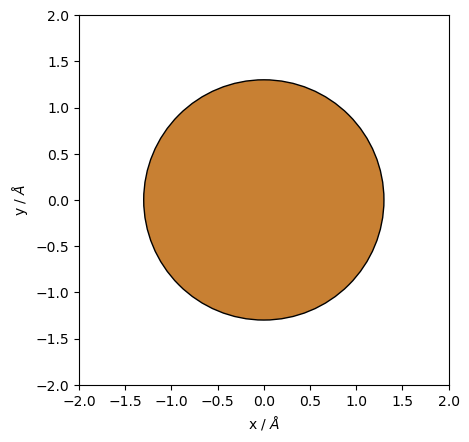

In [24]:
geom = aims.get_geometry()
geom.visualise()

It seems, we calculated a single Cu atom. But to be sure let's check the number of atoms.

In [25]:
n_atoms = aims.get_number_of_atoms()

print(n_atoms)

1


## Getting the control file

Let's say we want to check the control file. We can do that too.

In [26]:
control = aims.get_parameters()

print(control)

  # General Settings:

  xc	                           hse06 0.11

  hse_unit                           bohr-1

  #periodic_hf coulomb_threshold      1e-06

  #exx_band_structure_version         1

  #periodic_hf screening_threshold    1e-06

  #split_atoms                        .false.

  RI_method                          lvl_fast

  

  spin	                           none

  charge	                           0.0

  relativistic	                   atomic_zora scalar

  occupation_type	                   gaussian 0.05

  k_grid	                           24 24 24

  

  # Convergence Criteria:

  sc_accuracy_etot                   1e-06

  sc_accuracy_eev                    1e-03

  sc_accuracy_rho                    1e-05

  sc_accuracy_forces                 1e-03

  sc_iter_limit	                   200

  

  # Other Settings:

  many_body_dispersion_nl

  #use_dipole_correction	           .true.

  compensate_multipole_errors	   .true.

  #use_local_index                    .tru

## Benchmarking of the calculation

If we want to do some benchmarking of the calculation, it is useful to look a its stats.

Text(0.5, 1.0, 'Total number of SCF steps = 19')

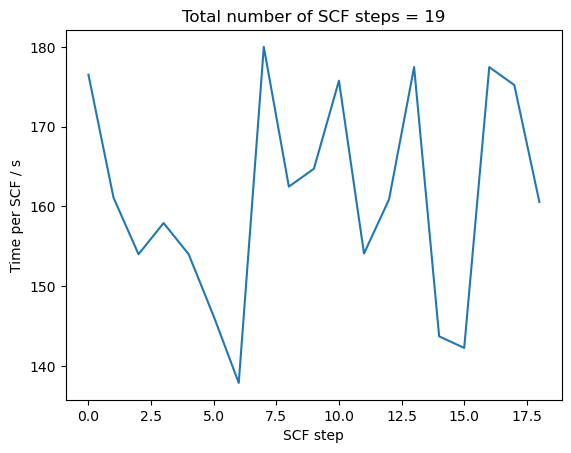

In [29]:
time_per_scf = aims.get_time_per_scf()

n_scf = aims.get_n_scf_iters()

plt.plot(time_per_scf)
plt.xlabel('SCF step')
plt.ylabel('Time per SCF / s')
plt.title(f'Total number of SCF steps = {n_scf}')